# Problem Statment:

##### analize and visualize to understand the medical insurance cost distribution different variables in the given dataset

## >Importing libraries and the dataset

In [1]:
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## >Few datas from the dataset

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## >Shap & information of the dataset

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### categorical_features : 'sex', 'smoker', 'region'
##### sex :male & female,
##### somker: yes,no,
##### region: southeast,northeast,southwest,northweast

## checking if there is any null values

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### #Here is no null value in the dataset,so no cleaning process are needed.

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### checking if there is any duplicates in the dataset

In [10]:
df.duplicated().sum()

np.int64(1)

#### #there is one duplicate in the dataset need to be removed

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

#### #all the duplicates are removed 

In [42]:
df.replace({'sex':{'male':1, 'female':0}, 
            'smoker':{'yes':1, 'no':0}}, inplace= True)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_categories,health_status
0,19,0,27.900,0,1,southwest,16884.92400,Young Adult,OverWeight
1,18,1,33.770,1,0,southeast,1725.55230,Young Adult,Obese
2,28,1,33.000,3,0,southeast,4449.46200,Young Adult,Obese
3,33,1,22.705,0,0,northwest,21984.47061,Young Adult,NormalWeight
4,32,1,28.880,0,0,northwest,3866.85520,Young Adult,OverWeight


#### >>Replacing male with 1 and female with 0
####  >>Replacing smoker with 1 and non smoker with 0

## >Studing gender distribution

In [14]:
df['sex'].value_counts()

sex
1    675
0    662
Name: count, dtype: int64

#### #There are 675 males and 662 females.

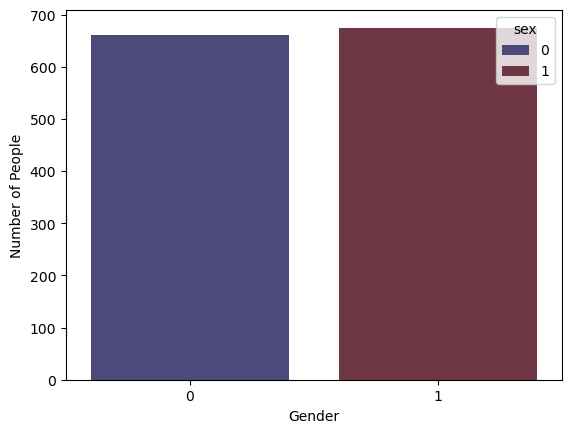

In [49]:
sns.countplot(x= 'sex', data= df,hue='sex', palette= 'icefire',)
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.show()

####            Male:1
####            Female:0

## >Medical charges by gender status

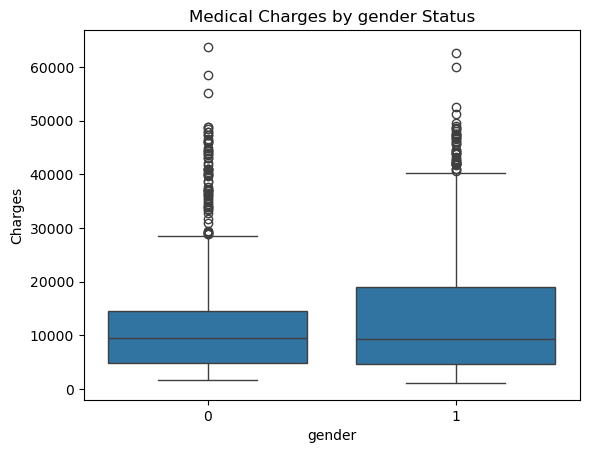

In [16]:
sns.boxplot(data=df, x='sex', y='charges')
plt.title("Medical Charges by gender Status")
plt.xlabel("gender")
plt.ylabel("Charges")
plt.show()

 ####            Male:1
####            Female:0

#### #males tends to have more medical support than females as the number of males and females are almost the same.

## >Studing smoker status

In [17]:
df['smoker'].value_counts()

smoker
0    1063
1     274
Name: count, dtype: int64

#### #There are 1063 smokers and 274 nonsmokers in the chart


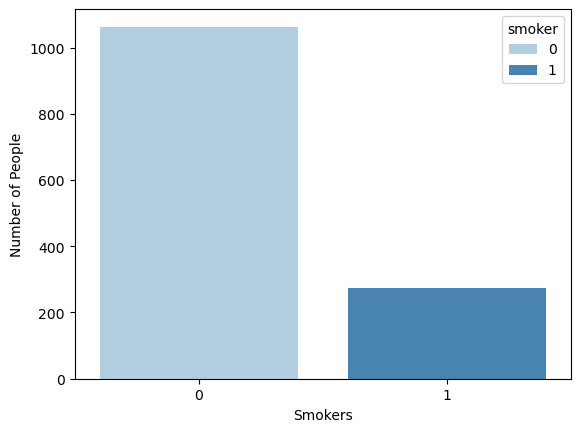

In [46]:
sns.countplot(x= 'smoker', data= df,hue='smoker', palette= 'Blues',)
plt.xlabel("Smokers")
plt.ylabel("Number of People")
plt.show()

####            Smoker:1
####            Non Smoker:0

## >Smoking status by gender distribution

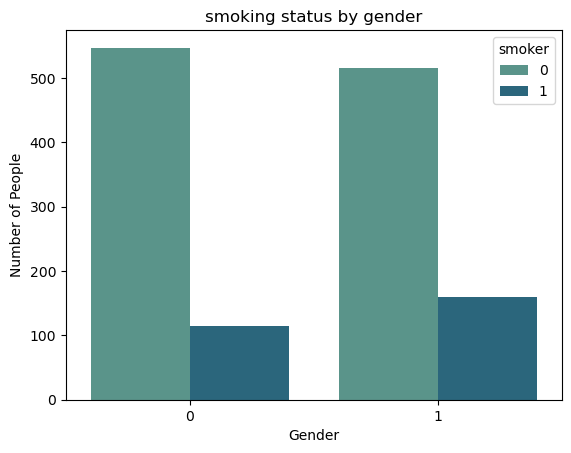

In [51]:
sns.countplot(x= 'sex', data= df,hue='smoker', palette= 'crest',)
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.title('smoking status by gender')
plt.show()

####            Male:1
####            Female:0
####            Smoker:1
####            Non Smoker:0

#### #number of female smokers are less than males


## >Medical charges by smoking status

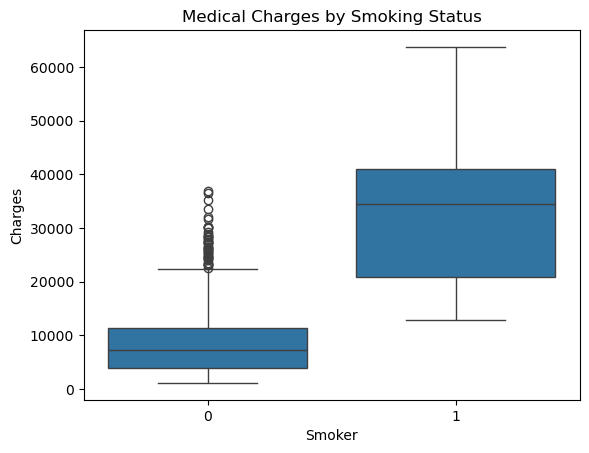

In [20]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title("Medical Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

####            Smoker:1
####            Non Smoker:0

#### #Smokers tends to have more medical support than nonsmokers

## >Children distribution

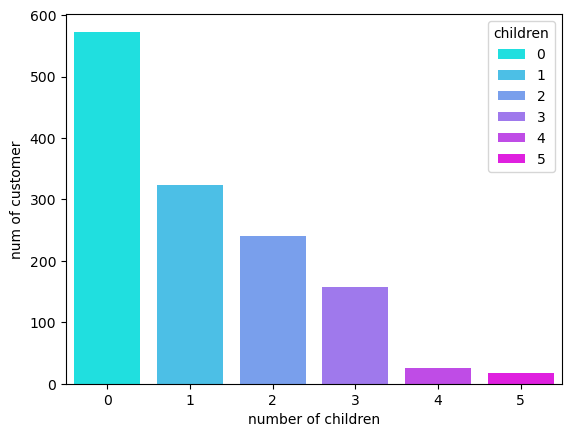

In [52]:
sns.countplot(x= 'children', data= df,hue='children', palette= 'cool',)
plt.xlabel("number of children")
plt.ylabel("num of customer")
plt.show()

#### #the customers without a child are the maximum 

## >medical charge distribution by number of children

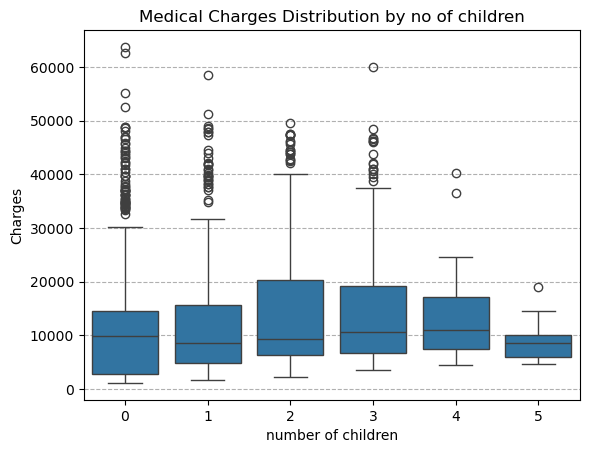

In [22]:
sns.boxplot(
    x='children',
    y='charges',
    data=df,
)
plt.title('Medical Charges Distribution by no of children')
plt.xlabel('number of children')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--')
plt.show()

## >Region distribution

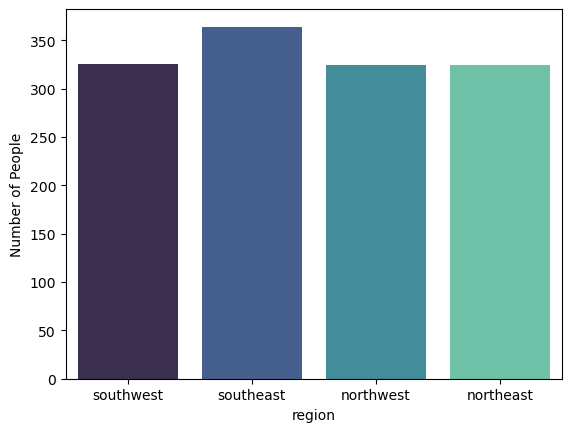

In [54]:
sns.countplot(x= 'region', data= df,hue='region', palette= 'mako',)
plt.xlabel("region")
plt.ylabel("Number of People")
plt.show()


#### #There are more customers from the southeast in the chart 

## >gender distribution by region

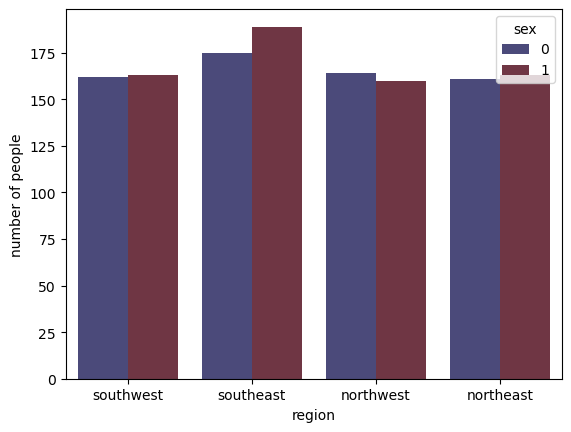

In [84]:
sns.countplot(x='region', hue= 'sex', data= df, palette= 'icefire',)
plt.xlabel("region")
plt.ylabel("number of people")
plt.show()

####            Male:1
####            Female:0

## >Smokers and medical charge distribution by region

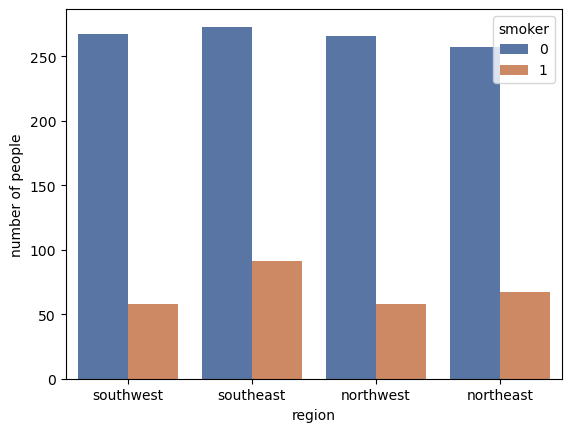

In [85]:
sns.countplot(x='region', hue= 'smoker', data= df, palette= 'deep',)
plt.xlabel("region")
plt.ylabel("number of people")
plt.show()

####            Smoker:1
####            Non Smoker:0

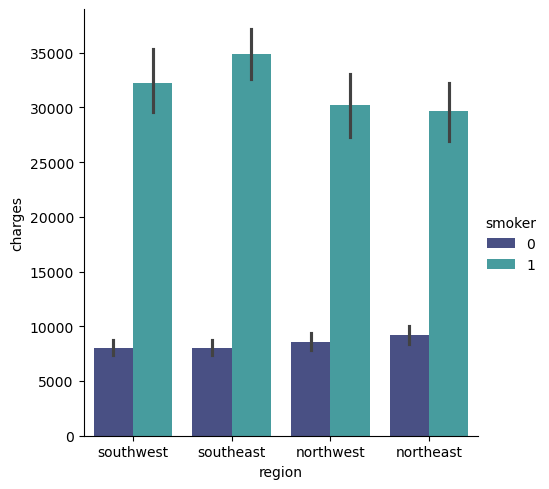

In [69]:
sns.catplot(x='region', y='charges', hue='smoker', kind='bar', data=df,palette= 'mako',)
plt.show()

####            Smoker:1
####            Non Smoker:0

## >Studying age distrbution

In [27]:
df['age'].min()

18

#### #Creating a new column "age_category" to seperate people by there age into 'Young Adult', 'Middle-aged adult', 'Senior','Elderly'.

In [28]:
cut_points= [18,35,55,75,100]
label_names= ['Young Adult', 'Middle-aged adult', 'Senior','Elderly']
df['age_categories']= pd.cut(df['age'], bins= cut_points, labels= label_names, right= False) 


In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_categories
0,19,0,27.900,0,1,southwest,16884.92400,Young Adult
1,18,1,33.770,1,0,southeast,1725.55230,Young Adult
2,28,1,33.000,3,0,southeast,4449.46200,Young Adult
3,33,1,22.705,0,0,northwest,21984.47061,Young Adult
4,32,1,28.880,0,0,northwest,3866.85520,Young Adult


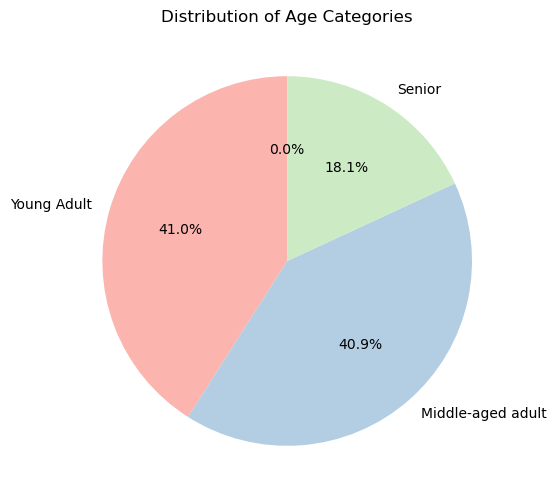

In [30]:
age_counts = df['age_categories'].value_counts()
age_counts.plot.pie(autopct='%1.1f%%',startangle=90,figsize=(6, 6),colors=plt.cm.Pastel1.colors,title='Distribution of Age Categories')
plt.ylabel('')
plt.show()

#### #Young adults people are maximum 

## >Smoking status by age distribution

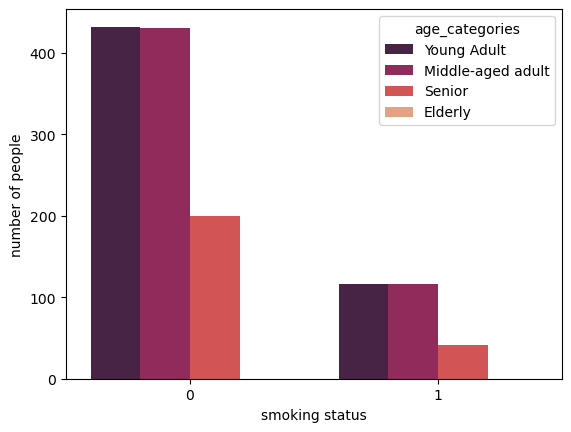

In [31]:
sns.countplot(x='smoker', hue= 'age_categories', data= df, palette= 'rocket',)
plt.xlabel("smoking status")
plt.ylabel("number of people")
plt.show()

####            Smoker:1
####            Non Smoker:0

#### #Young Adult & Middle-aged adults smokes the most

## >Medical charge distributon by age category

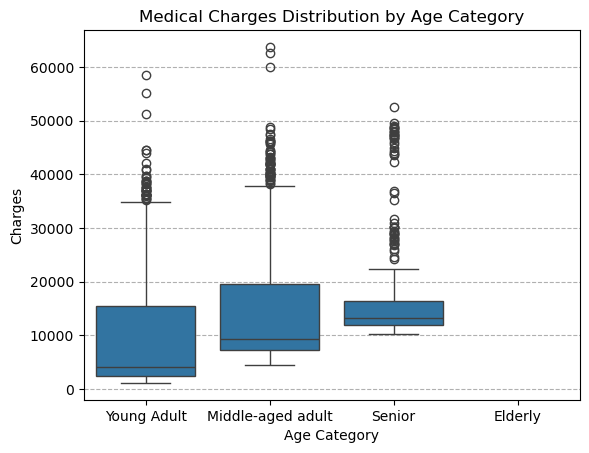

In [32]:
sns.boxplot(
    x='age_categories',
    y='charges',
    data=df,
)
plt.title('Medical Charges Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--')
plt.show()

## >Studing BMI distributon

In [33]:
df['bmi'].min()

15.96

In [34]:
df['bmi'].max()

53.13

#### #Creating a new column "health_status" to seperate people by there age into 'UnderWeight', 'NormalWeight', 'OverWeight','Obese'.

In [35]:
cut_points= [15.00,18.50,25.00,30.00,55.00]
label_names= ['UnderWeight', 'NormalWeight', 'OverWeight','Obese']
df['health_status']= pd.cut(df['bmi'], bins= cut_points, labels= label_names, right= False) 
df.head()


,age,sex,bmi,children,smoker,region,charges,age_categories,health_status
0,19,0,27.900,0,1,southwest,16884.92400,Young Adult,OverWeight
1,18,1,33.770,1,0,southeast,1725.55230,Young Adult,Obese
2,28,1,33.000,3,0,southeast,4449.46200,Young Adult,Obese
3,33,1,22.705,0,0,northwest,21984.47061,Young Adult,NormalWeight
4,32,1,28.880,0,0,northwest,3866.85520,Young Adult,OverWeight


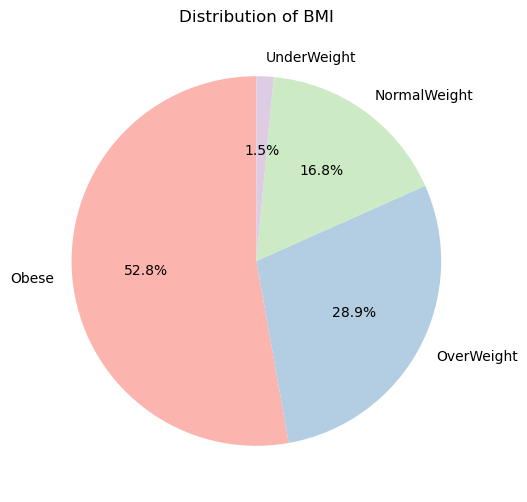

In [36]:
age_counts = df['health_status'].value_counts()
age_counts.plot.pie(autopct='%1.1f%%',startangle=90,figsize=(6, 6),colors=plt.cm.Pastel1.colors,title='Distribution of BMI')
plt.ylabel('')
plt.show()

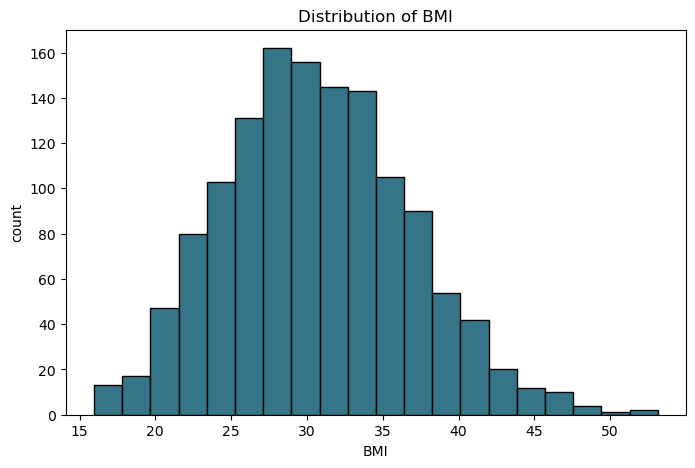

In [75]:
plt.figure(figsize=(8,5))
plt.hist(df['bmi'], bins=20, color='#367588', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('count')
plt.show()

#### #Odesity is increasing in people.

## >Health status by gender

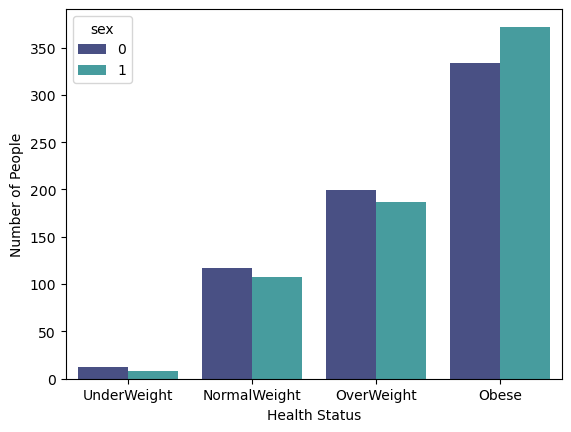

In [82]:
sns.countplot(x= 'health_status', data= df,hue='sex', palette= 'mako',)
plt.xlabel("Health Status")
plt.ylabel("Number of People")
plt.show()

####            Male:1
####            Female:0

#### #Obesity in males are more than in females.

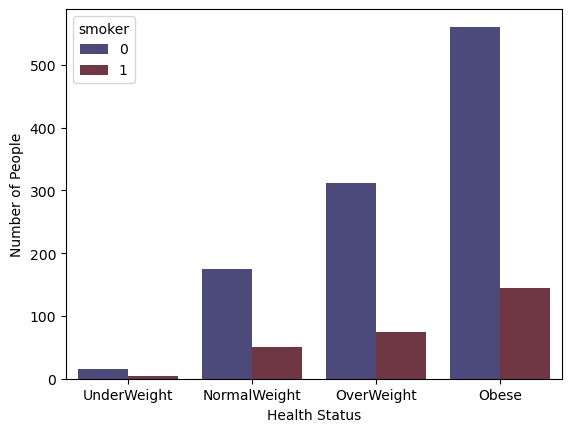

In [88]:
sns.countplot(x= 'health_status', data= df,hue='smoker', palette= 'icefire',)
plt.xlabel("Health Status")
plt.ylabel("Number of People")
plt.show()

####            Smoker:1
####            Non Smoker:0

## >Medical charge distributon by BMI

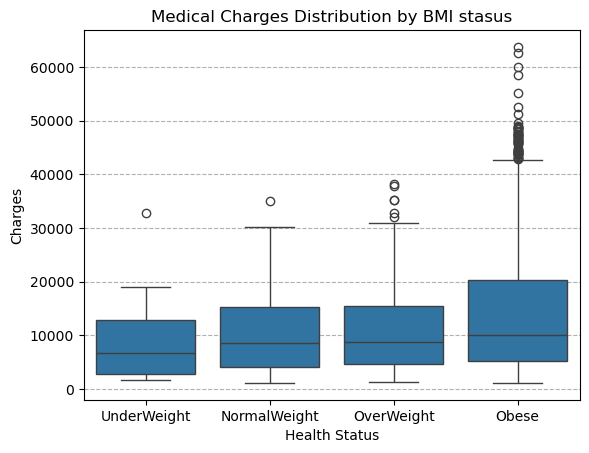

In [39]:
sns.boxplot(
    x='health_status',
    y='charges',
    data=df,
)
plt.title('Medical Charges Distribution by BMI stasus')
plt.xlabel('Health Status')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--')
plt.show()

#### #Obese people need more madical supports.

## >Health status by age category

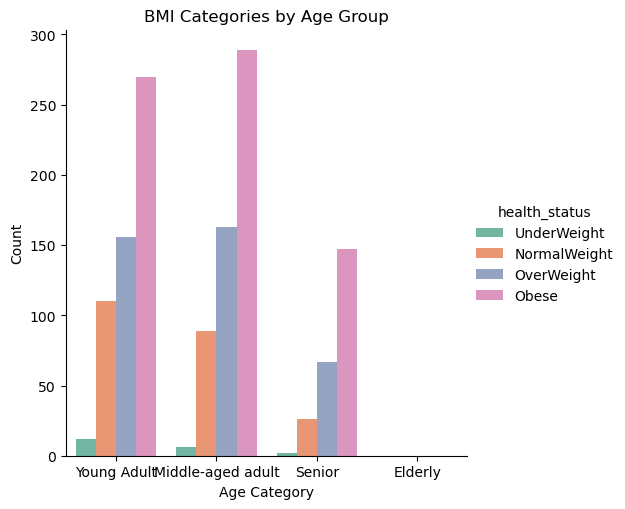

In [40]:
sns.catplot(x='age_categories', hue='health_status', kind='count', data=df, palette='Set2')

plt.title("BMI Categories by Age Group")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()

#### #Middel aged adults are getting more obese.

## >Studing corelation between the variables

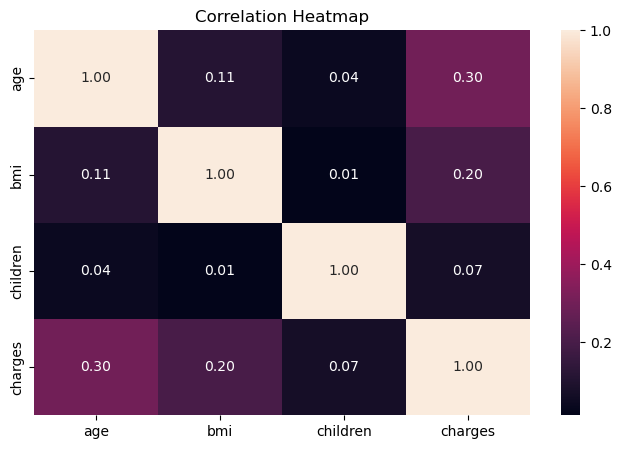

In [41]:
corr = df[['age', 'bmi', 'children', 'charges']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Conclusion:-
#### 1) Health problems:- Nowadays, obesity is a big problem facing society.  In terms of health status, obese people and overweight people
#### are seen more often than normal  weight people. Where's males are facing more obesity problems than females .But under weight is a major
#### problem in society which is worth considering.


#### 2) Region affected:- There are more smokers in northwest region than in the southwest at the regional Rate. Nowadays , smoking has become a big 
#### problem in all regions .And this problem should be solved in society.

#### 3) GENDER:- In society, males smoke more than females. But females are more affected by smoking in society. This has become a matter of concern 
#### in the present times.


#### 4)Age distribution:- The age category Rate shows that middle age adults are more susceptible to obesity in the current society. This will become
#### a big problem in terms of GDP , for which awareness should be increased among the people in the society.


#### 5) number of smoking peoples:- Among these who do not smoke, there are more people who say 'no ' than people who say 'yes ' . But the number 
#### of people's who smoke is very high at present, which is a matter of concern. Because smoking is a big problem in society .For which awareness
#### should be increased in society.